In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import time 
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14,14]

In [47]:
file_url= "E:\cons\pony\data\market\MarketSales_grouped_small.xlsx"
#file_url= "E:\cons\pony\data\market\MarketSales_grouped.xlsx"
grouped_purchased = pd.read_excel(file_url) # This may take a couple minutes
grouped_purchased.head()

,Unnamed: 0,CLIENTCODE,ITEMCODE,AMOUNT
0,0,1,1615,1.000
1,1,1,2733,1.000
2,2,1,2776,1.000
3,3,1,3780,1.000
4,4,1,3888,1.086


In [48]:
customer_list = grouped_purchased.CLIENTCODE.unique()
G2 = nx.Graph(label="CLIENT")
for c_id in customer_list:
    #print(cust_id)
    cust_id = "C" + str(c_id)
    #print(cust_id)
    G2.add_node(cust_id, key=cust_id, label='CUSTOMER')
    products = grouped_purchased[grouped_purchased['CLIENTCODE']==c_id]
    for i,rowi in products.iterrows():
        #print(cust_id, rowi['ITEMCODE'])
        G2.add_node(rowi['ITEMCODE'],label="PRODUCT")
        G2.add_edge(cust_id, rowi['ITEMCODE'], label="BOUGHT")

In [49]:
def get_all_adj_nodes(list_in):
    sub_graph=set()
    for m in list_in:
        sub_graph.add(m)
        for e in G2.neighbors(m):        
                sub_graph.add(e)
    return list(sub_graph)
def draw_sub_graph(sub_graph):
    subgraph = G2.subgraph(sub_graph)
    colors=[]
    for e in subgraph.nodes():
        if G2.nodes[e]['label']=="CUSTOMER":
            colors.append('cyan')
        elif G2.nodes[e]['label']=="PRODUCT":
            colors.append('yellow')
   
    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors)
    plt.show()

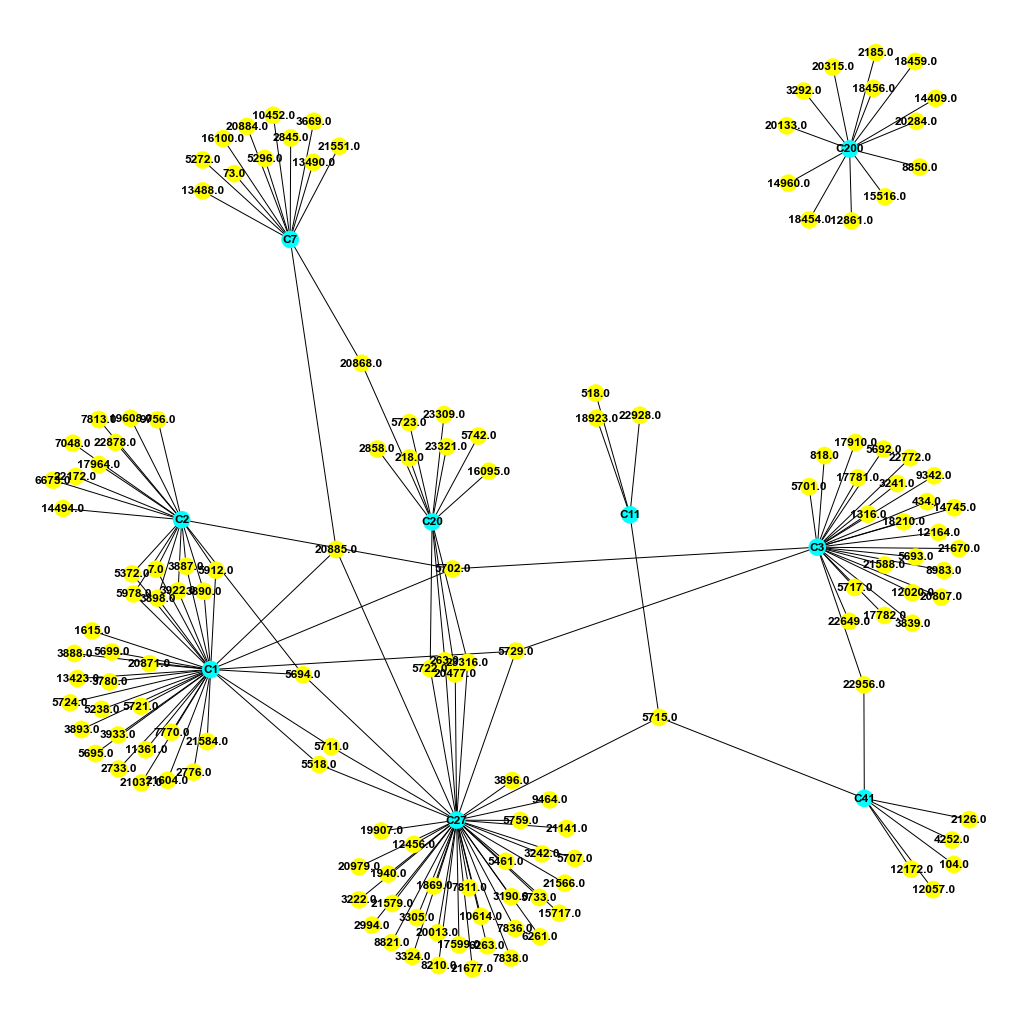

In [50]:
#list_in=[1.0,2.0,3.0,4.0, 9.0, 20.0, 50.0]
#list_in=[1.0,2.0,3.0,4.0, 9.0]
list_in=["C1","C2","C3", "C7", "C11", "C20", "C27", "C41", "C200"]
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

In [73]:
def get_recommendation(root):
    commons_dict = {}
    for e in G2.neighbors(root):
        print("-----------------visiting1:" + str(e))
        for e2 in G2.neighbors(e):
            print("visiting2:" + str(e2))
            if e2==root:
                continue
            if G2.nodes[e2]['label']=="CUSTOMER":
                commons = commons_dict.get(e2)
                if commons==None:
                    commons_dict.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2 : commons})
    products=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        #print("key:" + key + " value:" + values)
        print("*******")
        print(values)
        print("*******")
        for e in values:
            w=w+1/math.log(G2.degree(e))
        products.append(key) 
        weight.append(w)
    
    result = pd.Series(data=np.array(weight),index=products)
    result.sort_values(inplace=True,ascending=False)        
    return result;

In [74]:
result = get_recommendation("C1")
#result2 = get_recommendation("C11")
#result3 = get_recommendation("C7")
#result4 = get_recommendation("C55")
print("*"*40+"\n Recommendation for '1'\n"+"*"*40)
print(result.head())
#print("*"*40+"\n Recommendation for '2'\n"+"*"*40)
#print(result2.head())
#print("*"*40+"\n Recommendation for '3'\n"+"*"*40)
#print(result3.head())
#print("*"*40+"\n Recommendation for '4'\n"+"*"*40)
#print(result4.head())

-----------------visiting1:1615.0
visiting2:C1
visiting2:C133
visiting2:C403
visiting2:C518
visiting2:C603
visiting2:C894
-----------------visiting1:2733.0
visiting2:C1
visiting2:C101
visiting2:C572
-----------------visiting1:2776.0
visiting2:C1
-----------------visiting1:3780.0
visiting2:C1
visiting2:C35
visiting2:C435
visiting2:C533
visiting2:C639
visiting2:C809
visiting2:C813
visiting2:C855
-----------------visiting1:3888.0
visiting2:C1
visiting2:C35
visiting2:C54
visiting2:C208
visiting2:C210
visiting2:C239
visiting2:C358
visiting2:C404
visiting2:C443
visiting2:C552
visiting2:C566
visiting2:C616
visiting2:C745
visiting2:C854
visiting2:C888
visiting2:C922
-----------------visiting1:3893.0
visiting2:C1
visiting2:C23
-----------------visiting1:3933.0
visiting2:C1
visiting2:C84
visiting2:C244
visiting2:C359
visiting2:C930
-----------------visiting1:5238.0
visiting2:C1
-----------------visiting1:5518.0
visiting2:C1
visiting2:C19
visiting2:C27
visiting2:C33
visiting2:C102
visiting2:C115


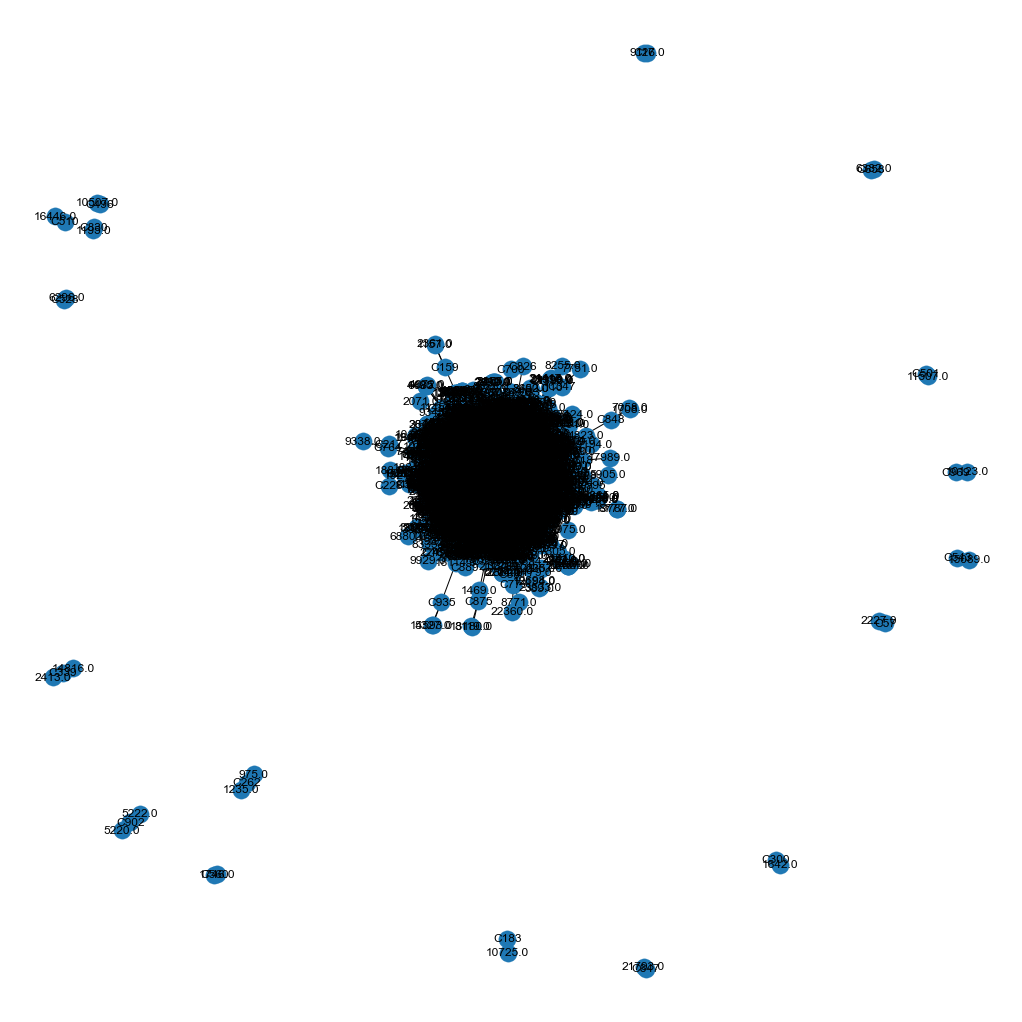

In [53]:
#nx.draw(G2, with_labels = True) 
#plt.savefig("myGraph.png") 